### Belal Elseraty

### Different CNNs Architectures and Evaluation Metrics

This notebook would illustrate different CNN archetictures in MNIST fashion classification, implemented using Keras, High-level API build on the top of Tensorflow.

It introduces different architecture options in Keras Sequential Models, neural networks, for classification tasks. 

Training and testing data is obtained from fashion MNIST, Keras library. All of following evaluation metrics:

1. Loss
2. Validation Loss
3. Accuracy 
4. Validation Accuracy
5. Training Time

Are compared to the original and different model, first one. 

### Imports

In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import time
%matplotlib inline

Using TensorFlow backend.


### Loading MNIST Fashion

In [0]:
fashion_data = keras.datasets.fashion_mnist

In [3]:
#the dataset is splitted into training and testing 
len(fashion_data.load_data())

4423680/4422102 [==============================] - 0s 0us/step


2

In [0]:
#load training and testing data
(training_images, training_labels) = fashion_data.load_data()[0]
(testing_images, testing_labels) = fashion_data.load_data()[1]

### Data Exploration

In [5]:
#Verify integrity of testing and training labels
print(training_labels.shape[0] == training_images.shape[0])
print(testing_labels.shape[0] == testing_images.shape[0])

True
True


(60000, 28, 28)


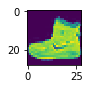

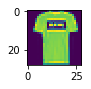

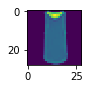

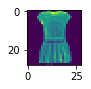

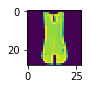

In [6]:
print(training_images.shape)
for image in training_images[:5]:
  plt.figure(figsize = (1,1))
  plt.imshow(image)

In [7]:
training_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

(10000, 28, 28)


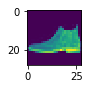

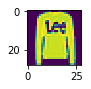

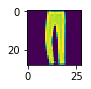

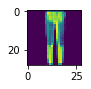

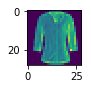

In [8]:
print(testing_images.shape)
for image in testing_images[:5]:
  plt.figure(figsize = (1,1))
  plt.imshow(image)

In [9]:
testing_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [0]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

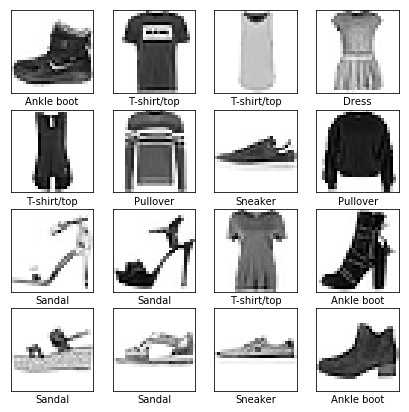

In [12]:
plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap='Greys')
    plt.xlabel(class_names[training_labels[i]])

### Evaluation Function
This function takes the model as an argument, with additional optimizers and training features, and evaluates the five main metrics mentioned in the notebook introduction

In [0]:
def evaluate(model, epochs = 5, title = None, batch_size = 256,adaptive_lr = False):
  if adaptive_lr:
    model.compile(optimizer='adadelta',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
  else:
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
  start_time = time.time()
  train_history = model.fit(training_images,
                            training_labels,
                            epochs = epochs,
                            validation_data=(testing_images, testing_labels),
                            batch_size = batch_size)
  elapsed_time = "--- %s seconds ---" % (time.time() - start_time)
  loss = train_history.history['loss']
  validation_loss = train_history.history['val_loss']
  accuracy = train_history.history['acc']
  validation_accuracy = train_history.history['val_acc']
  plt.figure(figsize = (10,8))
  plt.plot(loss)
  plt.plot(validation_loss)
  plt.plot(accuracy)
  plt.plot(validation_accuracy)
  plt.legend(['Loss', 'Validation Loss', 'Accuracy', 'Validation Accuracy'], loc = 0)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Value')
  print(' Loss Mean: {}\n Validation Loss Mean :{}\n Accuracy Mean :{}\n Validation Accuracy Mean:{}\nTraining time = {}'\
        .format(np.mean(loss), np.mean(validation_loss), np.mean(accuracy),np.mean(validation_accuracy), elapsed_time))
  return [loss, validation_loss, accuracy, validation_accuracy]

### Default Model

W0727 15:16:39.271503 140282304313216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6218 - acc: 0.7886 - val_loss: 0.4871 - val_acc: 0.8309
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4323 - acc: 0.8502 - val_loss: 0.4521 - val_acc: 0.8427
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3958 - acc: 0.8612 - val_loss: 0.4263 - val_acc: 0.8529
Epoch 4/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3690 - acc: 0.8714 - val_loss: 0.3956 - val_acc: 0.8609
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3488 - acc: 0.8765 - val_loss: 0.3900 - val_acc: 0.8634
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3350 - acc: 0.8806 - val_loss: 0.3859 - val_acc: 0.8607
Epoch 7/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3173 - acc: 0.8864 - val_loss: 0.

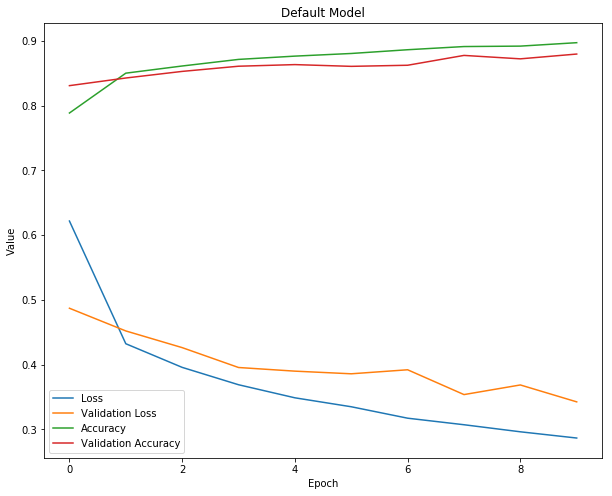

In [14]:
default_model = keras.Sequential([
    keras.layers.Flatten(input_shape=training_images.shape[1:]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
default_result = evaluate(default_model, epochs = 10, title = 'Default Model')

### Batch Normalized Model. Batch normalization layer should be between linear and non-linear layers of the network


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4944 - acc: 0.8259 - val_loss: 0.4592 - val_acc: 0.8471
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3456 - acc: 0.8743 - val_loss: 0.3758 - val_acc: 0.8674
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3059 - acc: 0.8881 - val_loss: 0.3552 - val_acc: 0.8694
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2830 - acc: 0.8964 - val_loss: 0.3523 - val_acc: 0.8721
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2598 - acc: 0.9044 - val_loss: 0.3428 - val_acc: 0.8767
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2398 - acc: 0.9111 - val_loss: 0.3403 - val_acc: 0.8808
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2282 - acc: 0.9162 - val_loss: 0.

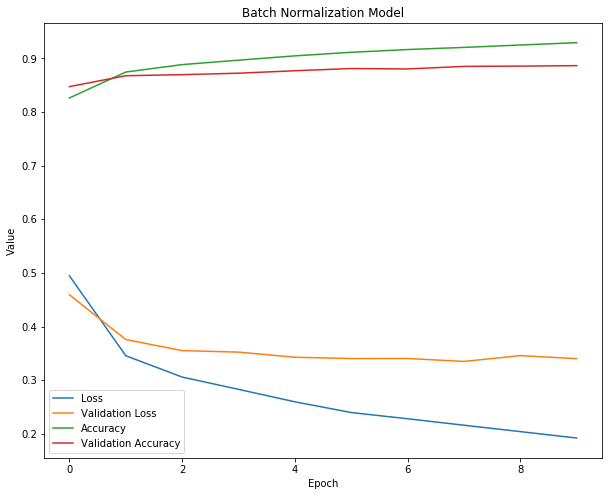

In [15]:
normalized_model = keras.Sequential([
    keras.layers.Flatten(input_shape=training_images.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
normalized_result = evaluate(normalized_model, epochs = 10, title = 'Batch Normalization Model')

### Drop Out Model. The dropout layer is added before output, by 0.5.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6591 - acc: 0.7732 - val_loss: 0.4796 - val_acc: 0.8393
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4550 - acc: 0.8373 - val_loss: 0.3937 - val_acc: 0.8586
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4116 - acc: 0.8528 - val_loss: 0.3854 - val_acc: 0.8592
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3867 - acc: 0.8621 - val_loss: 0.3667 - val_acc: 0.8666
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3699 - acc: 0.8676 - val_loss: 0.3592 - val_acc: 0.8694
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3574 - acc: 0.8684 - val_loss: 0.3560 - val_acc: 0.8704
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3487 - acc: 0.8747 - val_loss: 0.

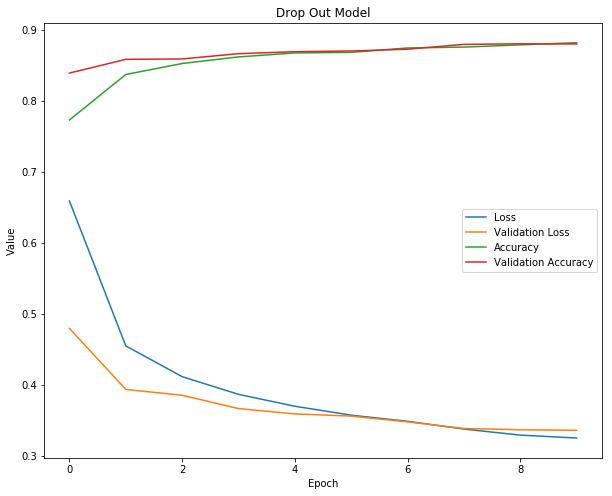

In [16]:
drop_model = keras.Sequential([
    keras.layers.Flatten(input_shape=training_images.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
drop_result = evaluate(drop_model, epochs = 10, title = 'Drop Out Model')

### Dynamic Batch Size Model

Enter batch size : 1024
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2730 - acc: 0.9022 - val_loss: 0.3388 - val_acc: 0.8807
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2629 - acc: 0.9052 - val_loss: 0.3387 - val_acc: 0.8805
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2613 - acc: 0.9056 - val_loss: 0.3417 - val_acc: 0.8829
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2544 - acc: 0.9086 - val_loss: 0.3307 - val_acc: 0.8816
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2504 - acc: 0.9108 - val_loss: 0.3317 - val_acc: 0.8829
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2486 - acc: 0.9107 - val_loss: 0.3373 - val_acc: 0.8810
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2475 - ac

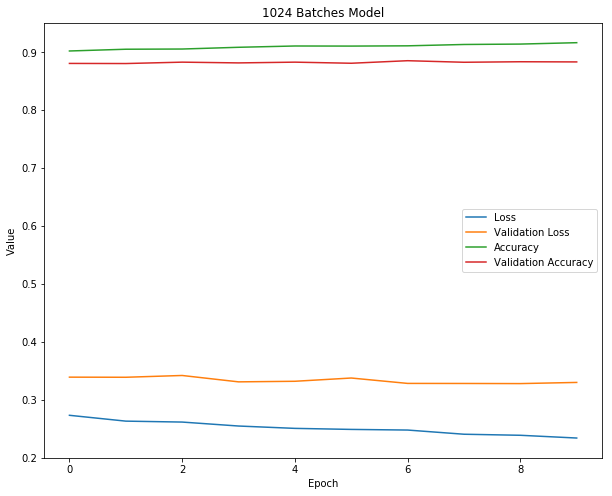

In [17]:
batch_size = int(input('Enter batch size : '))
batch_result = evaluate(default_model, epochs = 10, title = '{} Batches Model'.format(batch_size), batch_size = batch_size)

### Adaptive Learning Rate Model

This model uses Adadelta optimizer, look at the evaluation function.
This optimizer changes the learning rate dynamically according to the gradient value. 

Src: https://keras.io/optimizers/

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2299 - acc: 0.9187 - val_loss: 0.3261 - val_acc: 0.8855
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2271 - acc: 0.9200 - val_loss: 0.3244 - val_acc: 0.8862
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2258 - acc: 0.9204 - val_loss: 0.3236 - val_acc: 0.8868
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2251 - acc: 0.9205 - val_loss: 0.3231 - val_acc: 0.8868
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2246 - acc: 0.9205 - val_loss: 0.3228 - val_acc: 0.8872
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2242 - acc: 0.9209 - val_loss: 0.3225 - val_acc: 0.8869
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2239 - acc: 0.9211 - val_loss: 0.

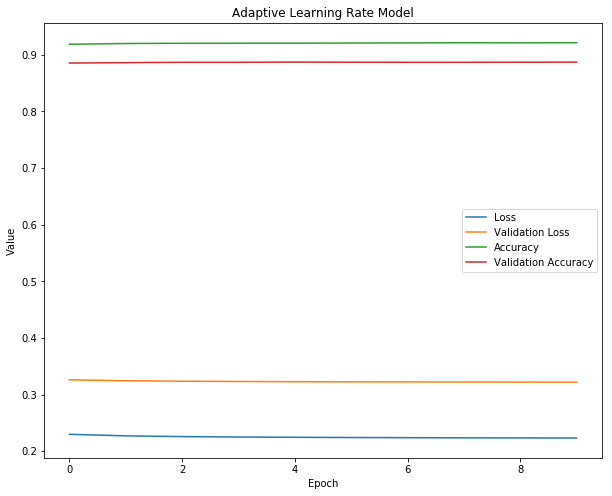

In [18]:
adaptive_results = evaluate(default_model, epochs = 10, title = 'Adaptive Learning Rate Model', adaptive_lr = True)

### Predictions
With the default model, feel free to test any other models 

In [0]:
predictions = default_model.predict(testing_images)

Plot predicted image



In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

22


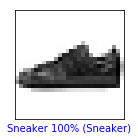

In [22]:
i = int(input())# index in testing images
plt.figure(figsize=(2,2))
plot_image(i, predictions, testing_labels, testing_images)
plt.show()